<a href="https://colab.research.google.com/github/nunival/462-Computer-Vision/blob/main/1_Fashion_mnist_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MSDS462 - Assignment 1
**Goal:** Train a classification model for the Fashion MNIST Kaggle Project

**Approach:** I'll be building a CNN model with TensorFlow to classify the images.

## Administrative Setup
***

In [37]:
import datetime
from datetime import datetime
from packaging import version
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn import model_selection
import sklearn
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras import utils
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

import tensorflow_datasets as tfds

In [38]:
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

In [39]:
print("This notebook requires TensorFlow 2.0 or above")
print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >=2

This notebook requires TensorFlow 2.0 or above
TensorFlow version:  2.4.1


In [40]:
print("Keras version: ", keras.__version__)

Keras version:  2.4.0


<div class="alert alert-block alert-info">
    <b>Suppress warning messages</b></div>

In [41]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [42]:
seed = 1234

In [43]:
# Mounting google drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [44]:
import os;
os.listdir("/content/gdrive/My Drive/462")

['kaggle.json']

# Loading Data
***

In [45]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
!cp /content/gdrive/My\ Drive/462/kaggle.json ~/.kaggle/kaggle.json


In [46]:
!kaggle datasets download -d zalando-research/fashionmnist
!ls -l /content


fashionmnist.zip: Skipping, found more recently modified local copy (use --force to force download)
total 275700
-rw-r--r-- 1 root root  22176691 Sep 21  2019 fashion-mnist_test.csv
-rw-r--r-- 1 root root 133047193 Sep 21  2019 fashion-mnist_train.csv
-rw-r--r-- 1 root root  72114846 Apr  1 00:38 fashionmnist.zip
drwx------ 6 root root      4096 Apr  1 00:38 gdrive
drwxr-xr-x 1 root root      4096 Mar 25 13:38 sample_data
-rw-r--r-- 1 root root   7840016 Sep 21  2019 t10k-images-idx3-ubyte
-rw-r--r-- 1 root root     10008 Sep 21  2019 t10k-labels-idx1-ubyte
-rw-r--r-- 1 root root  47040016 Sep 21  2019 train-images-idx3-ubyte
-rw-r--r-- 1 root root     60008 Sep 21  2019 train-labels-idx1-ubyte


In [47]:
!unzip /content/fashionmnist.zip

Archive:  /content/fashionmnist.zip
replace fashion-mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace fashion-mnist_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace t10k-images-idx3-ubyte? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace t10k-labels-idx1-ubyte? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [48]:
!ls

fashion-mnist_test.csv	 gdrive			 t10k-labels-idx1-ubyte
fashion-mnist_train.csv  sample_data		 train-images-idx3-ubyte
fashionmnist.zip	 t10k-images-idx3-ubyte  train-labels-idx1-ubyte


In [49]:
# Loading the data into training and testing splits
#train
train_path = "/content/fashion-mnist_train.csv"
data_train = pd.read_csv(train_path)
y_train = np.array(data_train.iloc[:, 0])
x_train = np.array(data_train.iloc[:, 1:])

#test
test_path = "/content/fashion-mnist_test.csv"
data_test = pd.read_csv(test_path)
y_test = np.array(data_test.iloc[:, 0])
x_test = np.array(data_test.iloc[:, 1:])

print("X Train Shape: ",x_train.shape)
print("y Train Shape: ",y_train.shape)
print("X Test Shape: ",x_test.shape)
print("y Test Shape: ",y_test.shape)


X Train Shape:  (60000, 784)
y Train Shape:  (60000,)
X Test Shape:  (10000, 784)
y Test Shape:  (10000,)


In [50]:
# Normalizing our data so the pixel values are between 0 and 1

x_train = x_train/255
x_test = x_test/255

In [51]:
x_train[0]

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.016, 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.243, 0.239, 0.082, 0.114, 0.09 ,
       0.2  , 0.533, 0.239, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.345, 0.788, 0.894, 0.882, 1.   , 0.451, 0.243,
       0.537, 1.   ,

### EDA
***

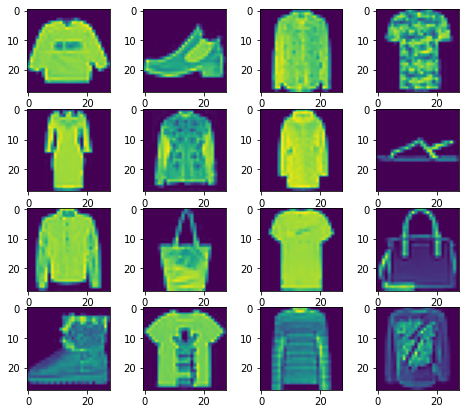

In [52]:
# Displaying 16 images to get a feel for what we're categorizing

def show_img(x):
    size_img = 28
    plt.figure(figsize=(8,7))
    num_images = 16
    n_samples = x.shape[0]
    x = x.reshape(n_samples, size_img, size_img)
    for i in range(num_images):
        plt.subplot(4, 4, i+1)
        plt.imshow(x[i])
    plt.show()
    
show_img(x_train)

In [53]:
# Checking if the data is balanced
data_train.loc[:,'label'].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

# Modeling
***

In [54]:
# Creating a validation set as well
X_train, X_val, y_train, y_val = train_test_split(x_train,y_train,test_size = 0.2,random_state = seed)

In [55]:
# Reshaping the data
image_shape = (28,28,1)

X_train = X_train.reshape(X_train.shape[0],*image_shape)
X_test = x_test.reshape(x_test.shape[0],*image_shape)
X_val = X_val.reshape(X_val.shape[0],*image_shape)

### Creating some helper functions

In [56]:
# Creating a function to compile and fit models
def compile_and_fit(model_n, metrics = ['accuracy']):
  start = datetime.now()
  model_n.compile(
              optimizer=tf.keras.optimizers.Adam()
              ,loss=tf.keras.losses.SparseCategoricalCrossentropy()
              ,metrics=metrics)
  history_n = model_n.fit(x = X_train
              ,y = y_train
              ,epochs = 100
              ,validation_data = (X_val, y_val)
              ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=6)]
                    )
  end = datetime.now()
  time_n = end - start
  return history_n, time_n

In [57]:
# Creating a function to allow for easier plotting of loss and accuracy
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [58]:
# Creating a function to easily plot a confusion matrix
def confusion_matrix(model):
  pred_classes = np.argmax(model.predict(X_val), axis=-1)
  conf_mx = tf.math.confusion_matrix(y_val, pred_classes)
  plt.figure(figsize=(16,8))
  plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
  plt.xlabel("Predicted Classes")
  plt.ylabel("Actual Classes")
  return plt.show()

### Building a CNN

In [59]:
model = tf.keras.Sequential([
                              tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation='relu', input_shape=(28, 28, 1))
                              ,tf.keras.layers.MaxPooling2D()
                              ,tf.keras.layers.Dropout(0.25)
                              ,tf.keras.layers.Conv2D(128, (3,3), padding = 'same', activation='relu')
                              ,tf.keras.layers.MaxPooling2D()
                              ,tf.keras.layers.Dropout(0.25)
                              ,tf.keras.layers.Conv2D(256, (3,3), padding = 'same', activation='relu')
                              ,tf.keras.layers.GlobalMaxPooling2D()
                              ,tf.keras.layers.Dropout(0.25)
                              ,tf.keras.layers.Flatten()
                              ,tf.keras.layers.Dense(128, activation='relu')
                              ,tf.keras.layers.Dense(10,activation='softmax')
])

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 256)        

In [61]:
# Compile
history, time = compile_and_fit(model)

Epoch 1/100
1500/1500 [==============================] - 7s 4ms/step - loss: 0.8872 - accuracy: 0.6671 - val_loss: 0.3545 - val_accuracy: 0.8701
Epoch 2/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3850 - accuracy: 0.8580 - val_loss: 0.3132 - val_accuracy: 0.8825
Epoch 3/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3253 - accuracy: 0.8828 - val_loss: 0.2758 - val_accuracy: 0.8971
Epoch 4/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2882 - accuracy: 0.8924 - val_loss: 0.2521 - val_accuracy: 0.9085
Epoch 5/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2728 - accuracy: 0.8991 - val_loss: 0.2358 - val_accuracy: 0.9128
Epoch 6/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2594 - accuracy: 0.9070 - val_loss: 0.2582 - val_accuracy: 0.8998
Epoch 7/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2405 - accuracy: 0.9122 - val_loss: 0.2231 - val_ac

In [62]:
print("Model runtime: ", time)

Model runtime:  0:02:53.169182


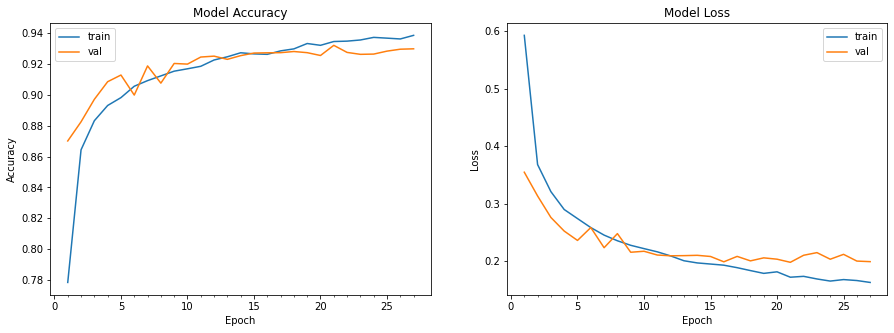

In [63]:
plot_model_history(history)

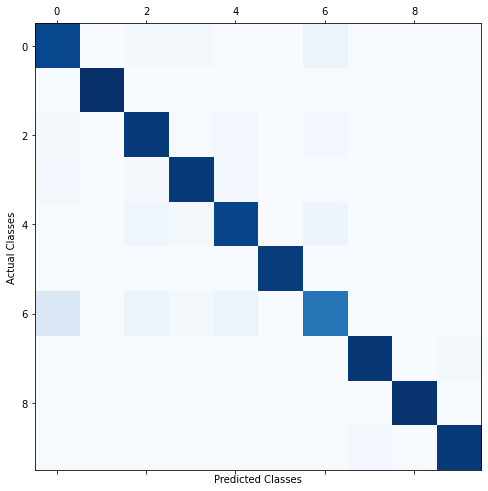

In [64]:
confusion_matrix(model)

### Evaluating on Test Data

In [65]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1890 - accuracy: 0.9312


In [66]:
print("Test Acc:\t", "{0:.1%}".format(results[1]))
print("Test Loss:\t", "{0:.3}".format(results[0]))

Test Acc:	 93.1%
Test Loss:	 0.189
